In [1]:
%matplotlib inline

# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import data 
city_data_to_load = '/content/drive/My Drive/Colab Notebooks/PyBer_Analysis/Resources/city_data.csv'
ride_data_to_load = '/content/drive/My Drive/Colab Notebooks/PyBer_Analysis/Resources/ride_data.csv'

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [9]:
# Get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
# Get the data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [18]:
# Get the number of data points from urban cities
sum(city_data_df['type'] == 'Rural')

18

In [19]:
# Get the columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [20]:
# Get the data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [25]:
# Merge DataFrames
pyber_complete_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])
pyber_complete_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [26]:
# Create DF for Urban cities
urban_cities_df = pyber_complete_df[pyber_complete_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [27]:
# Create DF's for Suburban and Rural
suburban_cities_df = pyber_complete_df[pyber_complete_df['type'] == 'Suburban']
rural_cities_df = pyber_complete_df[pyber_complete_df['type'] == 'Rural']
print(suburban_cities_df.head())
print(rural_cities_df.head())

               city                 date  ...  driver_count      type
1625  Barronchester  2019-01-27 03:08:01  ...            11  Suburban
1626  East Kentstad  2019-04-07 19:44:19  ...            20  Suburban
1627      Lake Omar  2019-01-17 21:33:35  ...            22  Suburban
1628     Myersshire  2019-02-27 17:38:39  ...            19  Suburban
1629    West Hannah  2019-04-19 01:06:59  ...            12  Suburban

[5 rows x 6 columns]
                 city                 date  ...  driver_count   type
2250   Randallchester  2019-04-13 11:13:31  ...             9  Rural
2251      North Holly  2019-02-02 14:54:00  ...             8  Rural
2252      Michaelberg  2019-03-27 18:27:34  ...             6  Rural
2253  Lake Latoyabury  2019-02-23 21:12:24  ...             2  Rural
2254  Lake Latoyabury  2019-05-06 08:57:56  ...             2  Rural

[5 rows x 6 columns]


In [32]:
# Create ride count by city type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [34]:
# Create ride count by city type
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
print(suburban_ride_count.head())
print(rural_ride_count.head())

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [37]:
# Get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [38]:
# Get the average fare for each city in suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
print(suburban_avg_fare.head())
print(rural_avg_fare.head())

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [41]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [42]:
# Get the average number of drivers for suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
print(suburban_driver_count.head())
print(rural_driver_count.head())

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


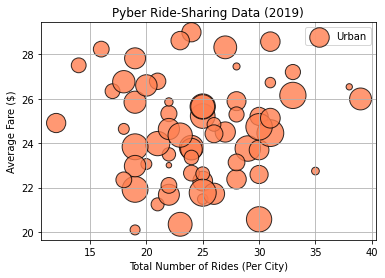

In [47]:
#Build Scatter plot for urban city
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count,
            color = 'coral',
            label = 'Urban',
            edgecolor = 'black',
            linewidths = 1,
            alpha = 0.8
            )
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add legend
plt.legend()

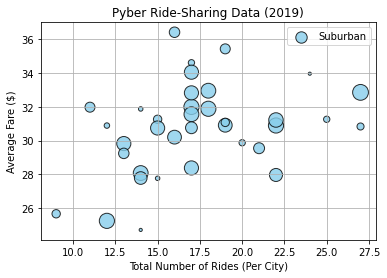

In [48]:
#Build Scatter plot for suburban city
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10 * suburban_driver_count,
            color = 'skyblue',
            label = 'Suburban',
            edgecolor = 'black',
            linewidths = 1,
            alpha = 0.8
            )
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add legend
plt.legend()

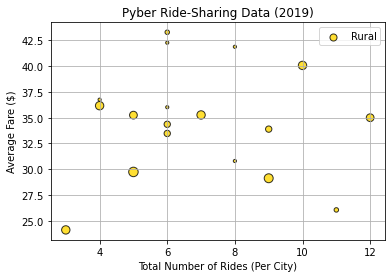

In [49]:
#Build Scatter plot for rural city
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10 * rural_driver_count,
            color = 'gold',
            label = 'Rural',
            edgecolor = 'black',
            linewidths = 1,
            alpha = 0.8
            )
plt.title('Pyber Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Add legend
plt.legend()

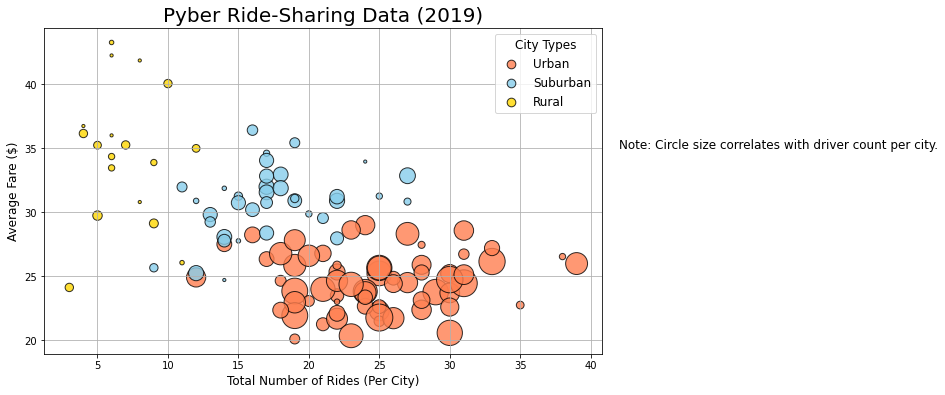

In [57]:
# Build the scatter plots for each city type into one scatter plot
# Urban
plt.subplots(figsize = (10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count,
            color = 'coral',
            label = 'Urban',
            edgecolor = 'black',
            linewidths = 1,
            alpha = 0.8
            )

# Suburban
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10 * suburban_driver_count,
            color = 'skyblue',
            label = 'Suburban',
            edgecolor = 'black',
            linewidths = 1,
            alpha = 0.8
            )

# Rural
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10 * rural_driver_count,
            color = 'gold',
            label = 'Rural',
            edgecolor = 'black',
            linewidths = 1,
            alpha = 0.8
            )

plt.title('Pyber Ride-Sharing Data (2019)', fontsize = 20)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.grid(True)
# Add legend
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("/content/drive/My Drive/Colab Notebooks/PyBer_Analysis/Analysis/Fig1.png")
# Show plot
plt.show()